In [1]:
intro_images_path='../dataset_part1/Images/Intro_images/'
edge_images_path='../dataset_part1/Images/Edge_images/'
seg_images_path='../dataset_part1/Images/Seg_images/'
feature_images_path='../dataset_part1/Images/Feature_images/'
output_path='./Images/Outputs/'
print('Image paths ....')

Image paths ....


# COMPUTER VISION I

**Master in Artificial Intelligence, USC, UDC, UVigo**

Academic year 2023/24


<img src="./Logotipo_Solo.png" width=200/>

## 1 Edge Detection

- Image gradients
- Noise effect and smoothing
- Derivative of Gaussian filter
- Canny edge detector
- Lapacian
- Hough transform

http://szeliski.org/Book/


### Exercise Image gradients

OpenCV provides three types of derivate (high-pass) filters: Sobel, Scharr and Laplacian.
Repeat the first exercises on this page:
https://docs.opencv.org/4.3.0/d5/d0f/tutorial_py_gradients.html
https://docs.opencv.org/3.4.2/d5/d0f/tutorial_py_gradients.html



#### First deriative filters: Sobel and Scharr

The Sobel operators combine Gaussian smoothing and differentiation, so the result is more or less resistant to noise.

    dst= cv.Sobel(src, ddepth, dx, dy, [, ksize[, scale[, delta[, borderType]]]])

You can specify the direction of derivatives to be taken, vertical or horizontal( passing values {0,1} as arguments of dx and dy respectively). You can also specify the size of kernel by the argument ksize. If ksize = -1, a 3x3 Scharr filter is used which gives better results than 3x3 Sobel filter.
Gradient filters can also be applied using the cv2.Filter2D() function. The following are the 3x3 kernels corresponding to  first x-  and  y- image derivatives: bare derivative without Gaussian smoothing, Sobel and Scharr.


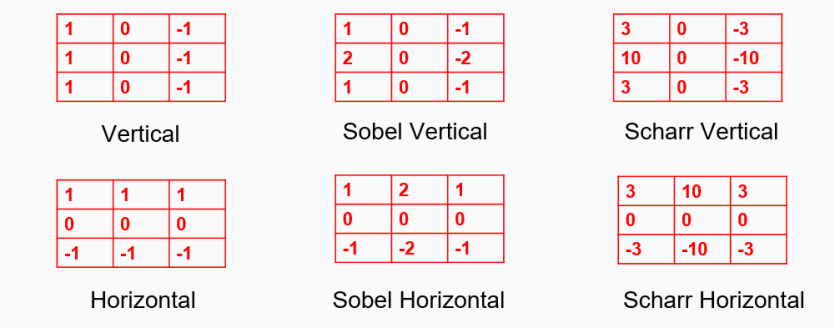


#### Second derivative filters: Laplacian

The Laplacian is the sum of the second partial derivatives. Opencv has the **cv2.laplacian()** function that implements the derivatives using the chain rule and Sobel filters.

    dst= cv2.Laplacian(src, ddepth,[ksize[, scale[, delta[, borderType]]]])

    If ksize == 1 (default), then following kernel is used for filtering:
    K=[[0, 1, 0]
       [1,-4, 1]
       [0, 1, 1]]

Below code shows all operators in a single diagram. All kernels are 3x3. Depth of output image is passed to get the result in np.uint8 type.

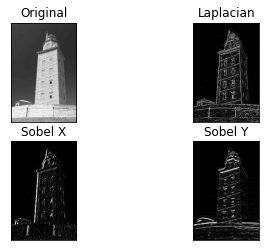

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(edge_images_path+'hercules_tower.jpg',0)
laplacian = cv2.Laplacian(img, cv2.CV_8U,ksize=3)
sobelx = cv2.Sobel(img, cv2.CV_8U,1,0,ksize=3)
sobely = cv2.Sobel(img, cv2.CV_8U,0,1,ksize=3)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

**IMPORTANT!**

Output datatype can be cv2.CV_8U or np.uint8, but there is a slight problem with that. Black-to-White transition is taken as Positive slope (it has a positive value) while White-to-Black transition is taken as a Negative slope (It has negative value). So when you convert data to np.uint8, all negative slopes are made zero. In simple words, you miss that edge.
If you want to detect both edges, better option is to keep the output datatype to some higher forms, like cv2.CV_64F, take its absolute value and then convert back to cv2.CV_8U. Below code demonstrates this procedure for a horizontal Sobel filter and difference in results.




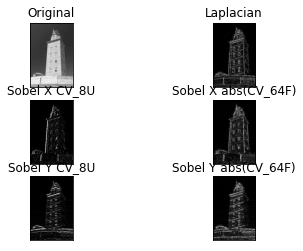

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(edge_images_path+'hercules_tower.jpg',0)
laplacian = cv2.Laplacian(img, cv2.CV_8U,ksize=3)

# Output dtype = cv2.CV_8U
sobelx8u = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=3)
sobely8u = cv2.Sobel(img,cv2.CV_8U,0,1,ksize=3)

# Output dtype = cv2.CV_64F. Then take its absolute and convert to cv2.CV_8U to visualze ite
sobelx64f = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobely64f = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
abs_sobelx64f = np.absolute(sobelx64f)
sobelx64f_to_8u = np.uint8(abs_sobelx64f)
abs_sobely64f = np.absolute(sobely64f)
sobely64f_to_8u = np.uint8(abs_sobely64f)

plt.subplot(3,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(3,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

plt.subplot(3,2,3),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel X CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(3,2,4),plt.imshow(sobelx64f_to_8u,cmap = 'gray')
plt.title('Sobel X abs(CV_64F)'), plt.xticks([]), plt.yticks([])

plt.subplot(3,2,5),plt.imshow(sobely8u,cmap = 'gray')
plt.title('Sobel Y CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(3,2,6),plt.imshow(sobely64f_to_8u,cmap = 'gray')
plt.title('Sobel Y abs(CV_64F)'), plt.xticks([]), plt.yticks([])
plt.show()

### Exercise Canny edge detector

https://docs.opencv.org/4.3.0/da/d22/tutorial_py_canny.html
https://docs.opencv.org/3.4.2/da/d22/tutorial_py_canny.html

Canny algorithm was designed to meet the criteria of  good detection,  good location and single response. It uses multiple stages, as shown  below. OpenCV implements it as the function  cv2.Canny().

    edges = cv2.Canny(image, threshold1, threshold2[,edges [,apertureSize[, L2gradient]]])
    
- First argument is the input image. 
- Second and third arguments are the thresholds. 
  The former (lowest) is used for edge linking. 
  While threshold2 (highest) is used to find initial segments of strong edges. 
- Argument apertureSize is the size of Sobel kernel used for computing image gradients. By default it is 3. 
- Last argument is L2gradient which specifies the equation for measuring gradient magnitude. If it is True, L2 norm is used, which is usually more accurate. By default, it is False and L1 norm is used

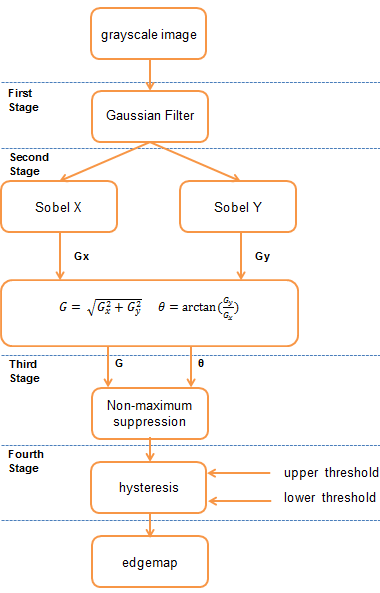

You can find a detailed implementation of the Canny detector here: https://towardsdatascience.com/canny-edge-detection-step-by-step-in-python-computer-vision-b49c3a2d8123

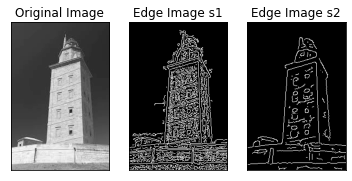

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread(edge_images_path+'hercules_tower.jpg',0)

img=cv2.GaussianBlur(image,(3,3),0) #some previous smothing is usually convenient
edges = cv2.Canny(img,5,15,apertureSize=3,L2gradient=True)

plt.subplot(131),plt.imshow(image,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image s1'), plt.xticks([]), plt.yticks([])


img=cv2.GaussianBlur(image,(15,15),0) #some previous smothing is usually convenient
edges = cv2.Canny(img,5,15,apertureSize=3,L2gradient=True)

plt.subplot(133),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image s2'), plt.xticks([]), plt.yticks([])
plt.show()

#### EXERCISE 1

1. Select the best values for threshold1, threshold2, and gaussian sigma, for each of the following images: chuvia.jpg, xardin.jpg, paseo.jpg.

2. Simple methods as: (1) computing the median gray-level values and determine high and low thresholds as simmetric values around the median; (2)thresholds based on the maximum of the gradient; (3) ....; work well depending on the image context.


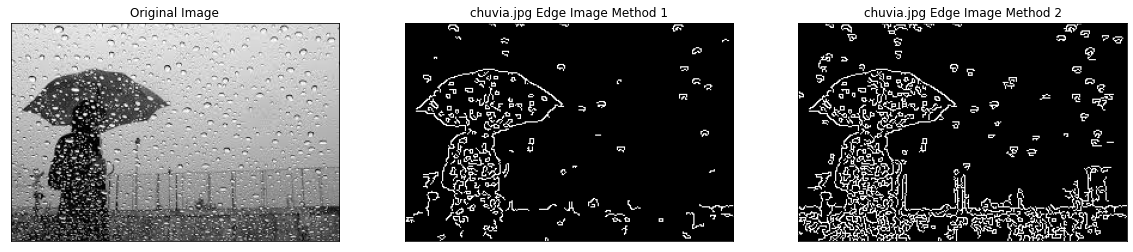

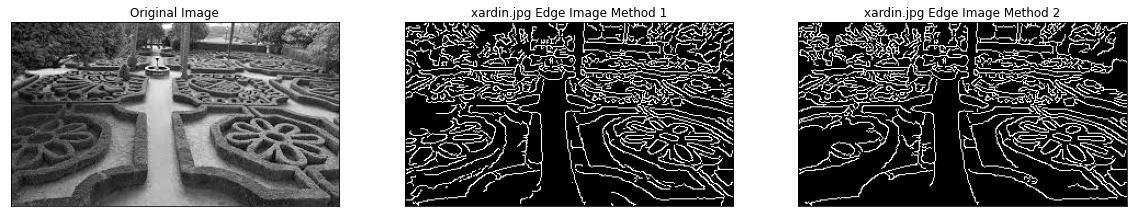

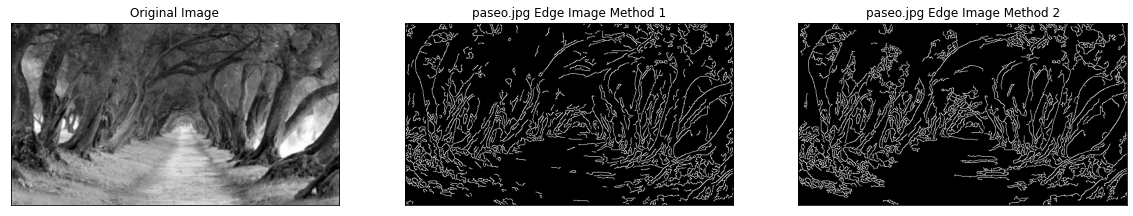

In [12]:
#SOLUTION HERE
import cv2
import numpy as np
from matplotlib import pyplot as plt


paths=["chuvia.jpg","xardin.jpg","paseo.jpg"]

for path in paths:
    image = cv2.imread(edge_images_path+path,0)


    ###Method 1: Compute the median gray-level value
    mediana = np.median(image)
    # Define thresholds method 1
    umbral_inferior = int(max(0, 0.7 * mediana))
    umbral_superior = int(min(255, 1.3 * mediana))

    # Apply GaussianBlur
    imagen_suavizada = cv2.GaussianBlur(image, (5, 5), 0)

    # Apply Canny for method 1
    edges1 = cv2.Canny(imagen_suavizada, umbral_inferior, umbral_superior)

    # Method 2: Compute maximum gradient value
    gradiente_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    gradiente_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    magnitud_gradiente = np.sqrt(gradiente_x**2 + gradiente_y**2)

    # Define thresholds method 2
    umbral_superior = int(0.2 * np.max(magnitud_gradiente))
    umbral_inferior = int(0.05 * umbral_superior)

    # Apply Canny for method 2
    edges2 = cv2.Canny(imagen_suavizada, umbral_inferior, umbral_superior)

    plt.figure(figsize=(20, 20))
    plt.subplot(131),plt.imshow(image,cmap = 'gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(132),plt.imshow(edges1,cmap = 'gray')
    plt.title(path+' Edge Image Method 1'), plt.xticks([]), plt.yticks([])
    plt.subplot(133),plt.imshow(edges2,cmap = 'gray')
    plt.title(path+' Edge Image Method 2'), plt.xticks([]), plt.yticks([])
    plt.show()


In this exercise we have calculated the threshold values to apply the edge detection filter in two different ways. And they have been applied on 3 different images. 
The first method consists in obtaining the average pixel value (with the image in grayscale). This value is then multiplied by a reduction or enlargement factor to obtain the lower and upper thresholds. Once these thresholds are calculated, we apply a Gaussian filter and then a Canny filter with the threshold values as thresholds.

The second method consists of calculating the thresholds from the maximum of the image gradient. For this we calculate the gradient with the function cv2.Sobel() and once calculated, we multiply for a reduction and enlargement factor to create the thresholds that will then be applied to the Canny filter.

#### EXERCISE 2

Compare the following two template matching alternatives  regarding their  performance : (i) case of using image intensity as features for matching, and  (ii) case of using their edge maps as features. Use faces.jpg and two different templates right_eye.jpg and right_eye_i.jpg. You  will have to compute their edge maps to perform the matching in case (ii).

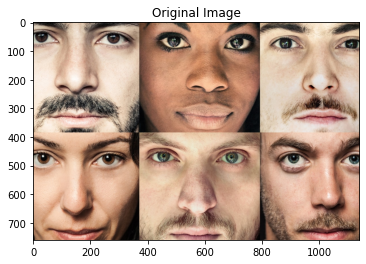

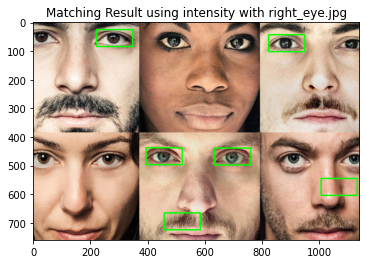

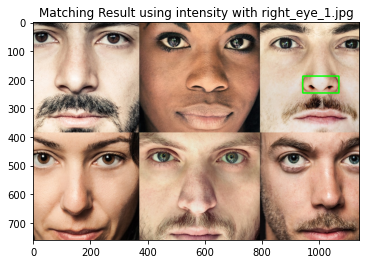

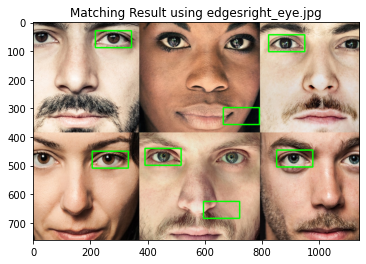

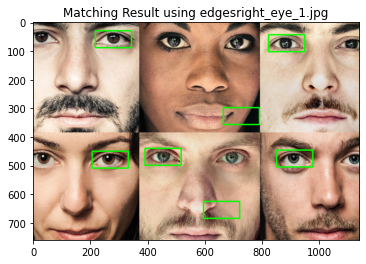

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Function for matching using intensity
def match_using_intensity(img, template):
    result = cv2.matchTemplate(img, template, cv2.TM_CCOEFF_NORMED)
    _, max_val, _, max_loc = cv2.minMaxLoc(result)
    return max_val,max_loc

#Function for matching using edges
def match_using_edges(img, template):
    # Calculate image gradient
    gradiente_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    gradiente_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    magnitud_gradiente = np.sqrt(gradiente_x**2 + gradiente_y**2)
    #Apply GaussianBlur
    imagen_suavizada = cv2.GaussianBlur(img, (5, 5), 0)
    template_suavizada = cv2.GaussianBlur(template, (7, 7), 0)
    # Define thresholds for image  
    umbral_superior = int(0.3 * np.max(magnitud_gradiente))
    umbral_inferior = int(0.05 * umbral_superior)

    # Apply Canny for image
    img_edges = cv2.Canny(imagen_suavizada, umbral_inferior, umbral_superior)

    #Calculate template gradient
    gradiente_x = cv2.Sobel(template, cv2.CV_64F, 1, 0, ksize=3)
    gradiente_y = cv2.Sobel(template, cv2.CV_64F, 0, 1, ksize=3)
    magnitud_gradiente = np.sqrt(gradiente_x**2 + gradiente_y**2)

    # Define thresholds for template
    umbral_superior = int(0.35 * np.max(magnitud_gradiente))
    umbral_inferior = int(0.2 * umbral_superior)

    # Apply Canny for template
    template_edges = cv2.Canny(template_suavizada, umbral_inferior, umbral_superior)

    # Match using edges
    result = cv2.matchTemplate(img_edges, template_edges, cv2.TM_CCOEFF_NORMED)
    _, max_val, _, max_loc = cv2.minMaxLoc(result)
    return max_val,max_loc

# Load image and template
image = cv2.imread(edge_images_path+'faces.jpg',cv2.IMREAD_COLOR)
template1 = cv2.imread(edge_images_path+'right_eye.jpg')
template2 = cv2.imread(edge_images_path+'right_eye_i.jpg')
templates=[template1,template2]
# Show original image
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

# Show matching results
image_names=['right_eye.jpg','right_eye_1.jpg']
j=0
# Match using edges
for template in templates:
    # Match using 
    img=image.copy()
    image2=image.copy()
    rectangles=[]
    #Make a loop to find all the matches
    while True:
        #Match using edges
        max_val,loc1_intensity = match_using_intensity(img, template)
        # Get the size of the template. Ignore the 3rd value returned by shape
        w, h = template1.shape[:2]
        top_left = loc1_intensity
        bottom_right = (top_left[0] + h, top_left[1] + w)
        #Create a rectangle
        rectangle=(top_left,bottom_right)
        #Add the rectangle to the list
        rectangles.append(rectangle)
        #If the max_val is less than 0.145, we stop the loop
        if max_val<0.52:
            break
        #If not, we set the area of the image where the rectangle is to 0
        img[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]] = 0
    
    #Show the image with the rectangles
    for i in range(len(rectangles)):
        #Draw the rectangle
        cv2.rectangle(image2, rectangles[i][0], rectangles[i][1], (0, 255, 0), 4)
    #Show the image
    plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
    plt.title('Matching Result using intensity with '+image_names[j])
    plt.show()
    j+=1



j=0
# Match using edges
for template in templates:
    # Match using 
    img=image.copy()
    image2=image.copy()
    rectangles=[]
    #Make a loop to find all the matches
    while True:
        #Match using edges
        max_val,loc1_intensity = match_using_edges(img, template)
        # Get the size of the template. Ignore the 3rd value returned by shape
        w, h = template1.shape[:2]
        top_left = loc1_intensity
        bottom_right = (top_left[0] + h, top_left[1] + w)
        #Create a rectangle
        rectangle=(top_left,bottom_right)
        #Add the rectangle to the list
        rectangles.append(rectangle)
        #If the max_val is less than 0.145, we stop the loop
        if max_val<0.145:
            break
        #If not, we set the area of the image where the rectangle is to 0
        img[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]] = 0
    
    #Show the image with the rectangles
    for i in range(len(rectangles)):
        #Draw the rectangle
        cv2.rectangle(image2, rectangles[i][0], rectangles[i][1], (0, 255, 0), 4)
    #Show the image
    plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
    plt.title('Matching Result using edges'+image_names[j])
    plt.show()
    j+=1




When applying the template detection on the image, we see that if we use the intensity as detector, only for right_eye.jpg we get good results because right_eye_1.jpg is in BGR format, and therefore the intensities are upside down so we do not get to detect any eye. However, using edges as detectors we do get the same results for both images, since we are applying a Guassian filter and then the edge detector, so the color space in which the image is located does not influence.

The detection using edges that has been implemented consists of applying a Gaussian filter and then the Canny edge detector to both the image and the template in order to obtain the edges. For this process it was necessary to adjust this Gaussian filter and Canny's filter to detect the edges of the eyes but not to detect the rest of the facial features such as the beard. By eliminating these unnecessary facial features, the detection of the eyes is possible. Even so, we have not been able to detect all eyes. The eyes that are on the edge of the image are not detected because they are half cut and when applying the filter the complete shape of the eye is not obtained. Finally, in the center of the figure I have not been able to adjust correctly the values of the edge detection filter so that all eyes can be detected, because every time I varied some parameter I lost detections, and the maximum I have been able to detect is 5 eyes.

### Exercise Hough Tranform

https://docs.opencv.org/3.4.2/d6/d10/tutorial_py_houghlines.html

A line in image space can be expressed with two parameters:
- In the Cartesian coordinate system:  (m,b).
- In the Polar coordinate system: (r,θ)
For Hough Transforms, we will express lines in the Polar system. Hence, a line equation can be written as   r=xcosθ+ysinθ. In general for each point (x0,y0), we can define the family of lines that goes through that point as  r=x0cosθ+y0sinθ. Meaning that each pair (r,θ) represents each line that passes by (x0,y0).

Hough Transform is encapsulated in the OpenCV function cv2.HoughLines().

    lines=cv.HoughLines(edges, rho, theta, threshold [, srn[, stn[, min_theta[,max_theta]]]]])
    
- It simply returns an array of (r,θ) values; r is measured in pixels and θ  is measured in radians. 
- First parameter, edges image should be a binary image, so apply threshold or use canny edge detection before applying Hough transform. 
- Second and third parameters are rho and theta accuracies, respectively. 
- Fourth argument is the threshold, which means minimum votes it should get for it to be considered as a line. Remember, number of votes depend upon number of points detected on the line.

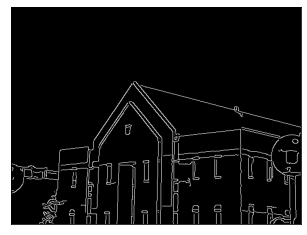

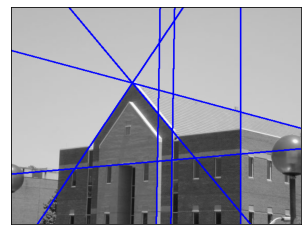

In [2]:
import cv2
import numpy as np
import math
from matplotlib import pyplot as plt

img = cv2.imread(edge_images_path+'building.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray=img
imgP=img.copy()

gray = cv2.GaussianBlur(img,(7,7),0)
edges = cv2.Canny(gray,1,50,apertureSize=3,L2gradient=True)
lines = cv2.HoughLines(edges,1,np.pi/180,120)

#Draw all the lines
if lines is not None:
  for i in range(0,len(lines)):
      rho = lines[i][0][0]
      theta = lines[i][0][1]
      a = np.cos(theta)
      b = np.sin(theta)
      x0 = a * rho
      y0 = b * rho
      pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
      pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
      cv2.line(imgP, pt1, pt2, (0,0,255), 2)

plt.imshow(edges,cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(imgP,cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

A  more efficient implementation of the Hough Line Transform is the function **HoughLinesP()**.
It returns the extremes of  detected lines (x0,y0,x1,y1). This function has two extra parameters:

- MinLineLength: Minimum line length. Line segments shorter than it are rejected.
- MaxLineGap: Maximum allowed gap between points on the same line to link them.


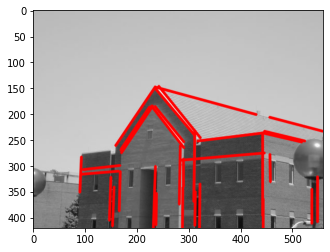

In [3]:
linesP = cv2.HoughLinesP(edges,1,np.pi/180,50,
                 minLineLength=50,maxLineGap=10)

imgP=img.copy()

if linesP is not None:
   for i in range(0, len(linesP)):
      l = linesP[i][0]
      cv2.line(imgP, (l[0], l[1]), (l[2], l[3]), (255,0,0), 3, cv2.LINE_AA)


plt.imshow(imgP)
plt.show()

### EXERCISE 3

Consider the image naval.jpg. Try to detect lines with the best trade-off between the numbers of True Positive lines and False Negative ones. Consider different levels of smoothing when applying Canny detector.

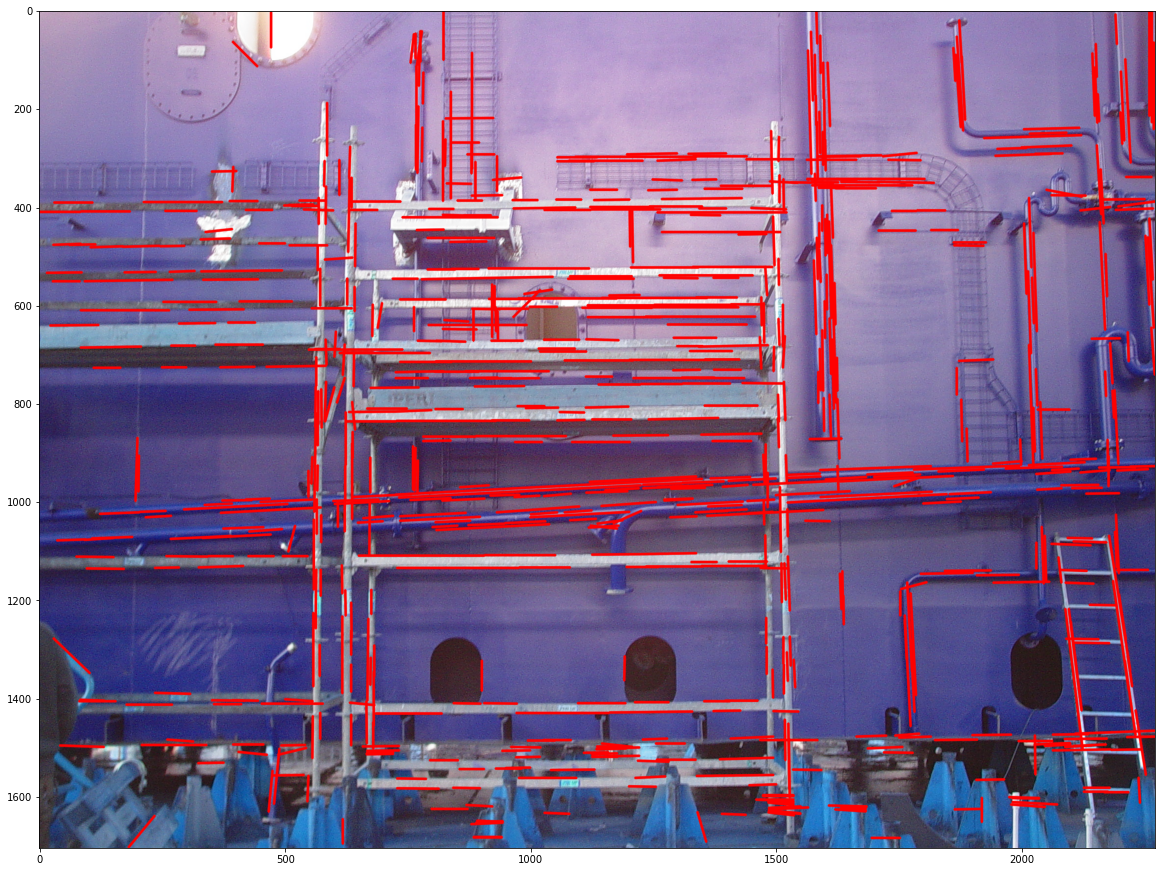

In [14]:
#SOLUTION HERE

import cv2
import numpy as np
import math
from matplotlib import pyplot as plt

img = cv2.imread(edge_images_path+'naval.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray=img
imgP=img.copy()

gray = cv2.GaussianBlur(img,(9,9),0)
edges = cv2.Canny(gray,1,50,apertureSize=3,L2gradient=True)
lines = cv2.HoughLines(edges,1,np.pi/180,120)

linesP = cv2.HoughLinesP(edges,1,np.pi/180,50,
                 minLineLength=50,maxLineGap=10)

imgP=img.copy()

if linesP is not None:
   for i in range(0, len(linesP)):
      l = linesP[i][0]
      cv2.line(imgP, (l[0], l[1]), (l[2], l[3]), (255,0,0), 3, cv2.LINE_AA)

plt.figure(figsize=(20, 20))
plt.imshow(imgP)
plt.show()


### Exercise: Hough Transform applied to circles

https://docs.opencv.org/4.x/da/d53/tutorial_py_houghcircles.html

A circle is represented mathematically by its center *(xcenter,ycenter)* and its radius *r*. As it has 3 parameters, we need a 3D accumulator for hough transform. OpenCV offers the function **cv2.HoughCircles()**.

        circles= cv2.HoughCircles(image, method, dp, minDist[, param1[, param2[, minRadius[, maxRadius]]]])
        
- **image**	8-bit, single-channel, grayscale input image.
- **circles**	Output vector of found circles. Each vector is encoded as 3 or 4 element floating-point vector (x,y,radius) or (x,y,radius,votes) .
- **dp** Inverse ratio of the accumulator resolution to the image resolution: if dp=1 the accumulator has the same resolution as the input image; if dp=2 the accumulator has half as big width and height. 
- **minDist**	Minimum distance between the centers of the detected circles.
- **param1** Higher threshold of the two passed to the Canny edge detector (the lower one is twice smaller). 
- **param2** Accumulator threshold for the circle centers at the detection stage. 
- **minRadius**	Minimum circle radius.
- **maxRadius**	Maximum circle radius. 

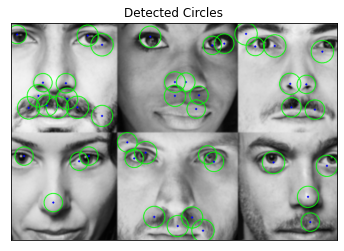

In [17]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt

img = cv2.imread(edge_images_path+'faces.jpg',0)
img = cv2.GaussianBlur(img,(9,9),2)

cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)


circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,dp=2,minDist=30, param1=40,param2=40,minRadius=30,maxRadius=40)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

plt.imshow(cimg)
plt.title('Detected Circles'), plt.xticks([]), plt.yticks([])
plt.show()

### ExERCISE 4

Implement a program for the estimation of the number of fishes in fishes.jpg image, according to the number of detected eyes. Choose the most convenient parameters.

Number of detected fishes:  14


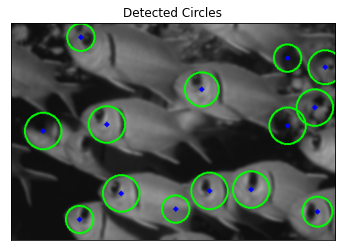

In [28]:
#SOLUTION HERE
import numpy as np
import cv2 
from matplotlib import pyplot as plt

img = cv2.imread(edge_images_path+'fishes.jpg',0)
img = cv2.GaussianBlur(img,(11,11),2)

cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)


circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,dp=2,minDist=30, param1=40,param2=40,minRadius=20,maxRadius=29)
circles = np.uint16(np.around(circles))
print('Number of detected fishes: ',len(circles[0]))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

plt.imshow(cimg)
plt.title('Detected Circles'), plt.xticks([]), plt.yticks([])
plt.show()